In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Casas_Guaruja.csv', sep=';')

In [3]:
df

,value,areas,bedrooms,spaces,bathrooms
0,134990.0,32.0,1.0,0.0,1.0
1,222000.0,46.0,2.0,1.0,1.0
2,975000.0,204.0,4.0,2.0,4.0
3,1400000.0,380.0,4.0,4.0,5.0
4,1300000.0,390.0,5.0,4.0,5.0
...,...,...,...,...,...
1582,4500000.0,600.0,4.0,6.0,6.0
1583,950000.0,306.0,3.0,3.0,4.0
1584,6800000.0,580.0,6.0,6.0,7.0
1585,900000.0,409.0,8.0,2.0,5.0


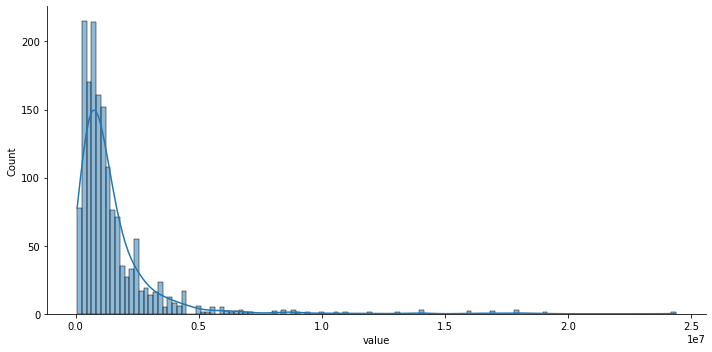

In [4]:
sns.displot(data=df['value'], aspect=2, kde=True)

In [5]:
df['value'].quantile(0.98)

6583999.999999992

In [6]:
casas_baratas = df.loc[df['value']<6584000]

In [7]:
df.describe()
casas_baratas.describe()

,value,areas,bedrooms,spaces,bathrooms
count,1.555000e+03,1555.000000,1555.000000,1497.000000,1554.000000
mean,1.273813e+06,310.381994,3.848875,3.682699,4.007722
std,1.059676e+06,195.213082,1.279349,2.040742,1.970142
min,6.500000e+04,32.000000,1.000000,0.000000,1.000000
25%,5.500000e+05,166.500000,3.000000,2.000000,2.000000
50%,9.500010e+05,290.000000,4.000000,4.000000,4.000000
75%,1.600000e+06,400.000000,5.000000,4.000000,5.000000
max,6.500000e+06,1833.000000,10.000000,20.000000,13.000000


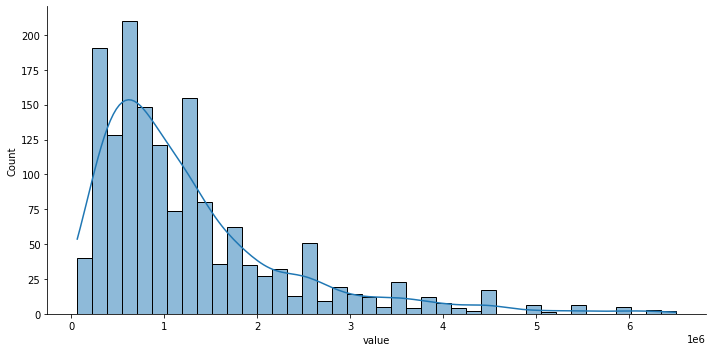

In [8]:
sns.displot(data=casas_baratas['value'], aspect=2, kde=True, bins=40)

<AxesSubplot:xlabel='value'>

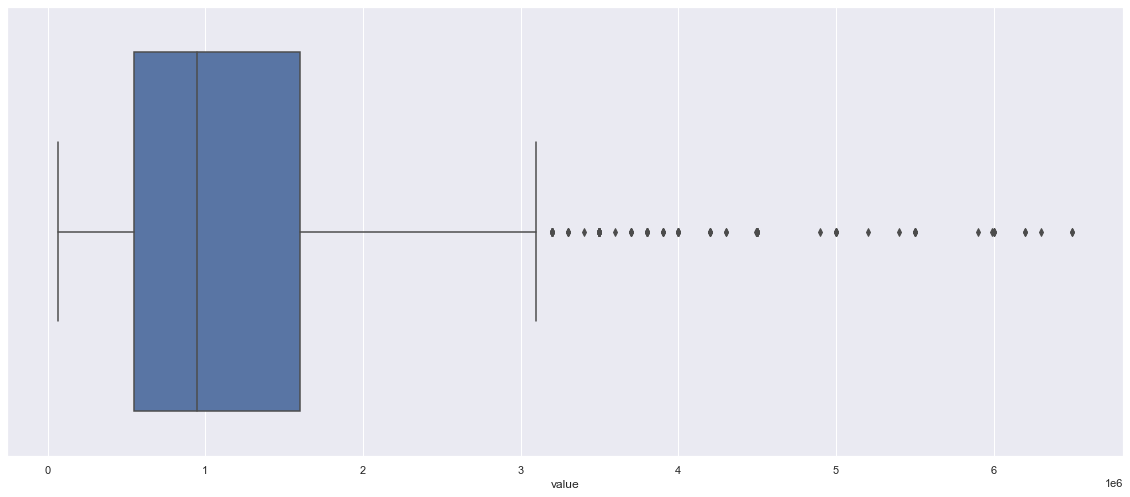

In [10]:


sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.boxplot(data=casas_baratas, x='value')
ax

<AxesSubplot:>

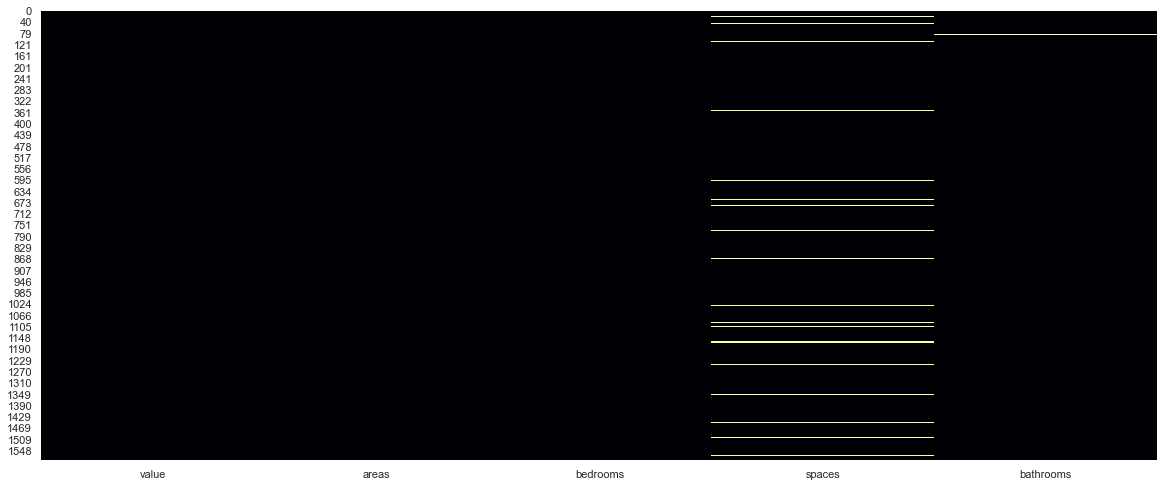

In [19]:

sns.heatmap(casas_baratas.isnull(),cbar=False,cmap='inferno')

In [24]:
casas_baratas_sem_na= casas_baratas.fillna(method='ffill')

# ajustando os dados

## Por se tratar de uma curva com assimetria a direita, aplicaremos a função logarítmica para que nossos dados se aproxime de uma curva normal

In [37]:
casas_baratas_sem_na['value'] = np.log(casas_baratas_sem_na['value'])

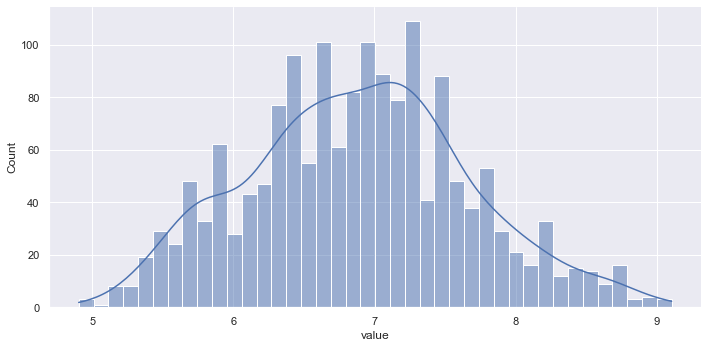

In [15]:
sns.displot(data=casas_baratas_sem_na['value'], aspect=2, kde=True, bins=40)

In [25]:
casas_baratas_sem_na[['areas', 'bedrooms', 'spaces', 'bathrooms']] = np.log(casas_baratas_sem_na[['areas', 'bedrooms', 'spaces', 'bathrooms']]+1)

In [26]:
casas_baratas_sem_na.describe()

,value,areas,bedrooms,spaces,bathrooms
count,1.555000e+03,1555.000000,1555.000000,1555.000000,1555.000000
mean,1.273813e+06,5.537227,1.543719,1.453767,1.528810
std,1.059676e+06,0.672671,0.267422,0.433444,0.416233
min,6.500000e+04,3.496508,0.693147,0.000000,0.693147
25%,5.500000e+05,5.120979,1.386294,1.098612,1.098612
50%,9.500010e+05,5.673323,1.609438,1.609438,1.609438
75%,1.600000e+06,5.993961,1.791759,1.609438,1.791759
max,6.500000e+06,7.514255,2.397895,3.044522,2.639057


# modelo

In [41]:
X_train, X_test, y_train, y_teste = train_test_split(casas_baratas_sem_na.drop(columns=['value']), casas_baratas_sem_na['value'])

In [42]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [43]:
modelo.score(X_test, y_teste)

0.6975647482769456

## 69%

In [44]:
X = casas_baratas_sem_na.drop(columns=['value'])
y = casas_baratas_sem_na['value']

In [45]:
modelo_estatistico = sm.OLS(y, X)

In [46]:
res = modelo_estatistico.fit()

In [47]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  value   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          6.307e+04
Date:                Thu, 29 Jul 2021   Prob (F-statistic):                        0.00
Time:                        20:40:11   Log-Likelihood:                         -2322.5
No. Observations:                1555   AIC:                                      4653.
Df Residuals:                    1551   BIC:                                      4674.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## retirando uma feature para ver como o modelo se comporta

In [48]:
Xnovo = casas_baratas_sem_na.drop(columns=['value', 'spaces'])
modelo_estatistico_sem_spaces = sm.OLS(y, Xnovo)
res_novo = modelo_estatistico_sem_spaces.fit()

In [49]:
print(res_novo.summary())

                                 OLS Regression Results                                
Dep. Variable:                  value   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          7.907e+04
Date:                Thu, 29 Jul 2021   Prob (F-statistic):                        0.00
Time:                        20:40:32   Log-Likelihood:                         -2370.5
No. Observations:                1555   AIC:                                      4747.
Df Residuals:                    1552   BIC:                                      4763.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
X_train_novo = X_train.drop(columns=['spaces'])
X_test_novo = X_test.drop(columns=['spaces'])

In [83]:
modelo_novo = LinearRegression()
modelo_novo.fit(X_train_novo, y_train)
modelo_novo.score(X_test_novo, y_teste)

0.6992953414440077


## 69%

### em andamento...